<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/Lillian_Poland_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

Decision trees make predictions by splitting components of data into smaller groups based on certain features. A decision tree starts with the root node which is the complete dataset. There are also decision nodes and leaf nodes, with decision nodes stemming from the root node and leading to other categories, and leaf nodes being the ending point. Decision tree models are just like the games in magazines that help you decide if you should live at the beach or the mountains (peak moments from my childhood). When the data is split you can use entropy or gini index with lower values for the two meaning the data is more pure. After doing all this you stop when you reach the maximum depth or minimum sample size.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth of a decision treee is the number of levels from the begining root node to the furthest leaf node. This would be the longest path from the begining to end and is like the number of generations of children the root has (cute family tree). We know if a tree is too deep if it has too many levels and is able to do well on training data but fails with new data. For example, the data in the notes would have been really bad with a high depth in its decision tree because it deals with overfitting. Individual decision trees are very prone to overfitting (a weakness of the model). Similarly, we know if a tree is not deep enough if it doesn't have much complexity and does not capture important patterns in the data.

**Task4:**

How are BART models similar and different from a decision tree?

BART models and decision trees are both tree structures, with the model splitting data up and making predictions at the leaf nodes. Both models are able to capture complex relationships, but decision trees are very prone to overfitting. BART starts with all the trees it needs and then uses boosting to alter each tree. BART also will automatically limit the tree depth and regularize the leaf node values which will help prevent extreme predictions. The decision trees are also different because they need manual tuning (telling the model what the depth should be) while the BART is controlled by priors. As mentioned before, the BART model wil prevent extreme values but the decision tree has no restriction. Ultimatelly, the decision trees are more simplistic to understand, but have a lot of problems that can come up, making the BART model more compatible for things in data science class where the audience already understands it.

**Task5**:

Why would we use a BART model instead of a decision tree?

Decision trees are simplistic and easy to understand, but a BART model is able to address the problems that decision trees cannot. A BART model is able to prevent overfitting more easily than a decision tree can by keeping trees shallow and preventing extreme predictions. The decision tree will need pruning (strategy to prevent unnecessary trees) or specific depth tuning, while the BART model does not. I think the main reason to use BART over a decision tree is the lack of manual tuning you must do for the BART model. This helps prevent error caused by something other than the actual model which makes it easier for the coder.  

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
!pip install pymc-bart
!pip install preliz

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
from sklearn import tree

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
X = penguins[['flipper_length','bill_depth','bill_length',]]
Y = penguins["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_penguinR:
    s = pm.HalfNormal('s', 20)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y)
    idata_penguinR = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

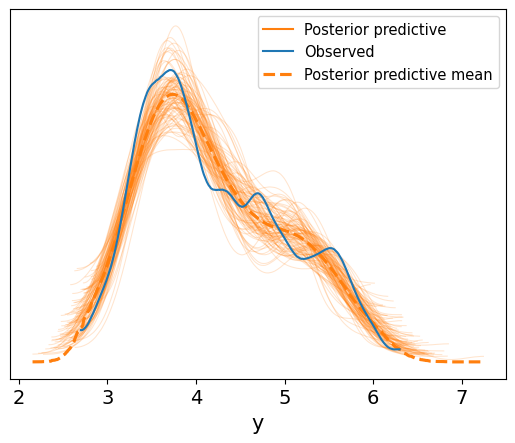

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguinR,model_penguinR, extend_inferencedata=True)
az.plot_ppc(idata_penguinR, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [ ]:
X = penguins["flipper_length"].to_numpy().reshape(-1, 1)
Y = penguins["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_penguin:
    s = pm.HalfNormal('s', 20)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y)
    idata_penguin = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

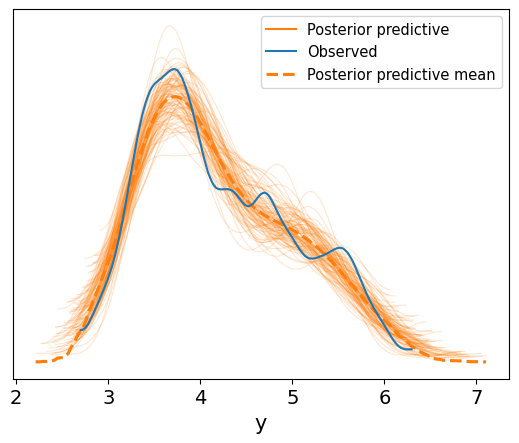

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguin,model_penguin, extend_inferencedata=True)
az.plot_ppc(idata_penguin, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [ ]:
posterior_mean = idata_penguin.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguin, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(idata_penguin, group="posterior_predictive", var_names=["y"]).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


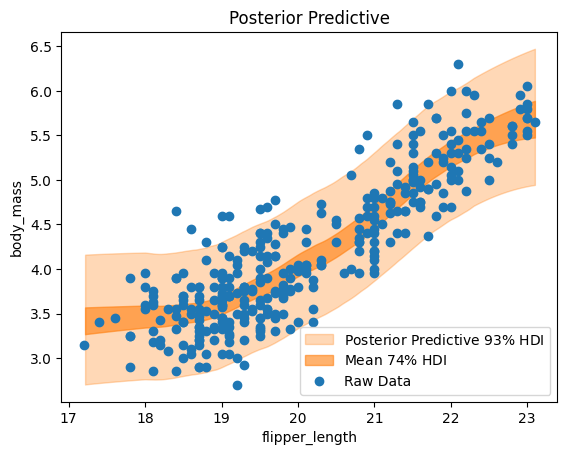

In [ ]:
idx = np.argsort(X[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I think the plot above captures the true association between flipper length and body mass in penguins. The plot is showing the positive relationship. So, as flipper length increases, body mass is generally higher. However, the relationship might not be exactly linear because we can see a bit of a curve. This could mean that there are other factors that influence body mass aside from flipper length (ex. bill depth). The uncertainty seen in the HDI tells us that the model is more certain about the predictions for penguins with average flipper length because the shaded regions is slightly thinner for those different areas. This also points out that the model is more uncertain about points that are on the extremes, the values for very short or very long flippers. The plot is pretty good, but there are still some things that aren't perfect.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

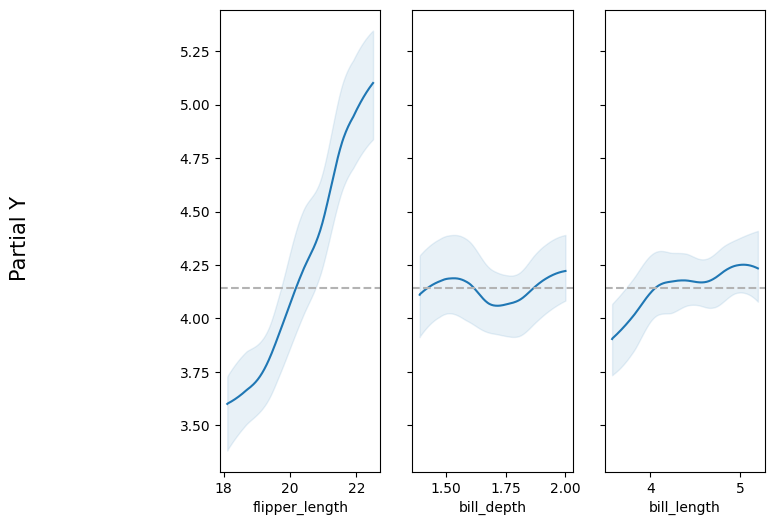

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

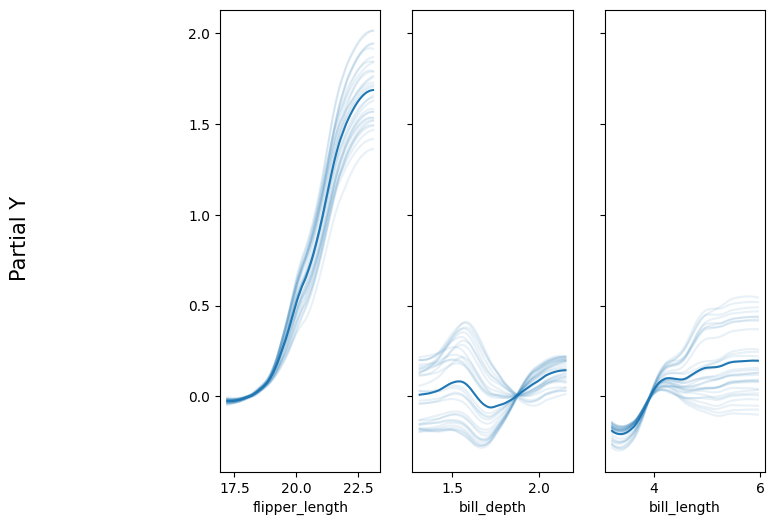

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [ ]:
vi_penguin = pmb.compute_variable_importance(idata_penguinR, μ_, X)

<Axes: ylabel='R²'>

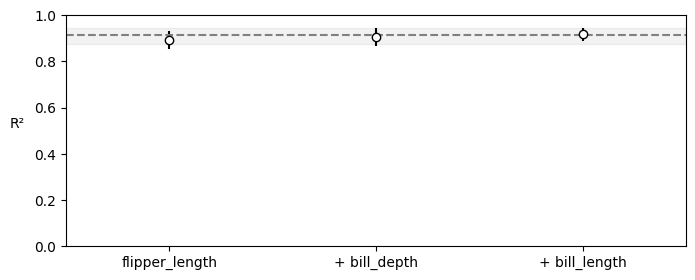

In [ ]:
pmb.plot_variable_importance(vi_penguin)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

I think flipper length is the most important predictor of body mass in penguins. It follows the positive pattern better when compared to bill depth and bill length. Bill length also has a good influence, but ultimately flipper length is the best.

As stated, the flipper length clearly shows a positive relationship with body mass. Bill length also has a positive relationship with body mass, but it is not as obvious compared to flipper length. I did my project for unit 7 about penguins and I assumed it was because of outside factors, such as different food sources. Bill depth shows the weakest relationship with body mass, showing that bill depth has a small impact on body mass.

Yes, there are definitely interactions between variables and other predictors. This is because there are some points/lines that deviate from the average pattern. Also, my project helped me discover that certain predictors have the most impact, while others have very minimal. But, the interactions might differ depending on the values of other variables. For example, the effect of bill length on body mass might be different for penguins with different flipper lengths.